# Bandwidth selection for KDE

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from KDEpy import FFTKDE
import cmasher as cmr

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

In [2]:
np.random.seed(0)
rand_dist = np.concatenate([sts.cauchy(-5, 1.8).rvs(500),
                            sts.cauchy(-4, 0.8).rvs(2000),
                            sts.cauchy(-1, 0.3).rvs(500),
                            sts.cauchy(2, 0.8).rvs(1000),
                            sts.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
rand_dist = rand_dist[(rand_dist > -15) & (rand_dist < 15)]


## Silverman rule-of-thumb

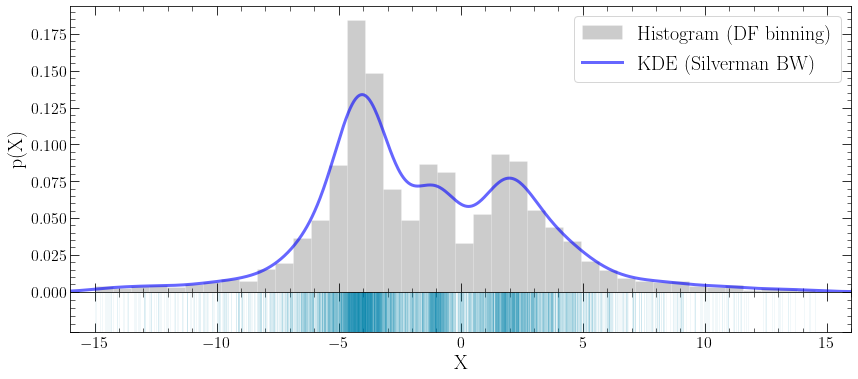

In [3]:
kde_bandwidth = 'silverman'
sil_kde_x, sil_kde_y = FFTKDE(kernel='gaussian', bw=kde_bandwidth).fit(rand_dist).evaluate()


fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot2grid((8,1),(0,0),fig=fig,rowspan=7)
ax1.hist(rand_dist,bins='fd',density=True, color='k',alpha=0.2, label='Histogram (DF binning)',edgecolor='white')

ax1.plot(sil_kde_x, sil_kde_y, color='b', alpha=0.6, lw=3, label='KDE (Silverman BW)')

ax1.set_ylabel('p(X)',fontsize=20)
ax1.set_xlim(-16,16)
ax1.legend(fontsize=20)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='major', length=9)
ax1.tick_params(axis='both', which='minor', length=4.5)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax1.set_xticklabels([])
ax2 = plt.subplot2grid((8,1),(7,0),fig=fig)
ax2.vlines(rand_dist,0,1,alpha=0.1,linewidth=0.5,color='#0186AF')
ax2.set_xlabel('X',fontsize=20)
ax2.set_ylim(0,1)
ax2.set_xlim(-16,16)
ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', length=9)
ax2.tick_params(axis='both', which='minor', length=4.5)
ax2.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2.set_yticklabels([])
fig.subplots_adjust(wspace=0.2,hspace=0)

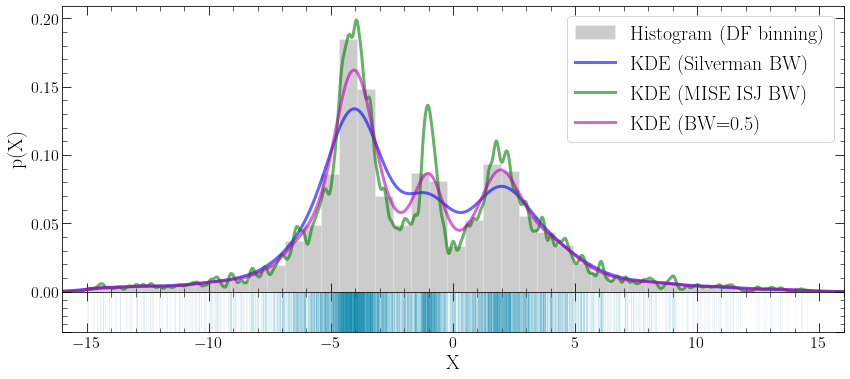

In [4]:
kde_bandwidth = 'silverman'
sil_kde_x, sil_kde_y = FFTKDE(kernel='gaussian', bw=kde_bandwidth).fit(rand_dist).evaluate()
kde_bandwidth = 'ISJ'
isj_kde_x, isj_kde_y = FFTKDE(kernel='gaussian', bw=kde_bandwidth).fit(rand_dist).evaluate()
kde_bandwidth = 0.5
num_kde_x, num_kde_y = FFTKDE(kernel='gaussian', bw=kde_bandwidth).fit(rand_dist).evaluate()


fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot2grid((8,1),(0,0),fig=fig,rowspan=7)
ax1.hist(rand_dist,bins='fd',density=True, color='k',alpha=0.2, label='Histogram (DF binning)',edgecolor='white')

ax1.plot(sil_kde_x, sil_kde_y, color='b', alpha=0.6, lw=3, label='KDE (Silverman BW)')
ax1.plot(isj_kde_x, isj_kde_y, color='g', alpha=0.6, lw=3, label='KDE (MISE ISJ BW)')
ax1.plot(num_kde_x, num_kde_y, color='m', alpha=0.6, lw=3, label=f'KDE (BW={kde_bandwidth})')

ax1.set_ylabel('p(X)',fontsize=20)
ax1.set_xlim(-16,16)
ax1.legend(fontsize=20)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='major', length=9)
ax1.tick_params(axis='both', which='minor', length=4.5)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax1.set_xticklabels([])
ax2 = plt.subplot2grid((8,1),(7,0),fig=fig)
ax2.vlines(rand_dist,0,1,alpha=0.1,linewidth=0.5,color='#0186AF')
ax2.set_xlabel('X',fontsize=20)
ax2.set_ylim(0,1)
ax2.set_xlim(-16,16)
ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', length=9)
ax2.tick_params(axis='both', which='minor', length=4.5)
ax2.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2.set_yticklabels([])
fig.subplots_adjust(wspace=0.2,hspace=0)